In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [11]:
data.shape

(4600, 18)

OK, so the first number tells us the number of rows (the number of houses) and the second one is the number of columns (the number of features).

We have 4600 houses in the dataset and 18 features, including price. Therefore, we can choose between 17 different features that influence the price of a house. Let's check these out.

In [12]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

We have a nice list of all the features, some being *categorical variables* (object types), like the country of the house and some being *measures* (float64 or int64 types) like the surface of the basement.

Just curious, what country are these houses in?

In [13]:
data.country.value_counts()

USA    4600
Name: country, dtype: int64

Interesting. What state ?


In [14]:
data.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Alright, so all of the houses are located in the state of Washington (Pacific Northwest, where Seattle is). This might serve us for later.

To me the first feature of a house that stands out is the number of bedrooms. Bigger houses have more bedrooms and thus command a higher price. Let's look at that relationship.


/home/osboxes/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

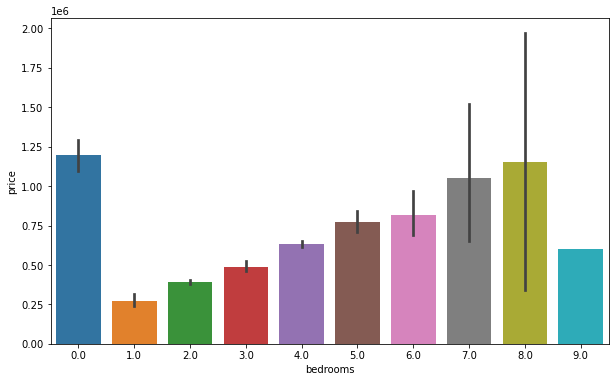

In [16]:
#get the average price for houses along their number of bedrooms:
plt.figure(figsize=(10,6))
sns.barplot(data.bedrooms, y=data['price'])

OK something strange here. There is clearly a relationship between the number of bedrooms and the average price of a house. However, seems that a house with 9 bedrooms (!) sells for less than a house with 4 bedrooms...

Also, some houses don't have any rooms?

Let's look at this in more detail.


In [17]:
# get a price breakdown for each bedroom group
bybedroom = data.groupby(['bedrooms']).price.agg([len, min, max])

In [18]:
#problem #1 and #2 - 2 houses with 0 bedrooms, giant outlier at 3 bedrooms
bybedroom

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


The table above provides an explanation for the price discrepancy we have seen. There is only one house with 9 bedrooms! This may be a house located far from the city, or the owner might have needed to sell it in a hurry. Whatever the circumstances, 1 house is not big enough a sample. We'll need to do something if we want to use the number of bedrooms as a predictor in our model.

The table above also highlighted 2 other problems with the data.

    Two houses have no bedroom!
    Some houses have a price of zero

Let's look at this last problem in more detail.


In [19]:
# problem #3 - houses with null prices
houses_zero= data[data.price==0]
print('There are '+str(len(houses_zero))+' houses without a price')

There are 49 houses without a price


Out of 4600 houses in the sample, 49 don't have a price. It's not a lot, but this might confuse the model.

We're almost done with exploring the features. Let's look at the price distribution.


/home/osboxes/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

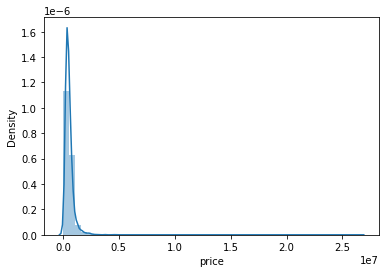

In [23]:
# problem #4 - house prices are not normal
sns.distplot(data['price'])

The price distribution is in blue. Clearly, houses prices are not normal. This is not a problem per se, rather something to keep in mind.

So, to recap, we have 3 problems :

    Houses with 0 bedroom
    Giant outlier at almost $27M - 50 times the price of a normal house
    49 houses without a price

We'll take the easy way out - remove them from our analysis.


In [24]:
# new dataframe without problem #1 #2 #3
houses_o = data[(data.price<2.5*10**7) & (data.bedrooms>0) & (data.price>0)].copy()

Now, there is one other potential problem with our data. There are too few houses with more than 6 bedrooms. This is a problem if we want to use the number of bedrooms as a predictor of house price.

To fix this, we can simply group the houses with 7, 8 and 9 bedrooms with the houses featuring 6 bedrooms.


In [26]:
#recode houses with more than 6 bedrooms as 6 bedrooms
houses_o['bedrooms_recoded'] = houses_o['bedrooms'].replace([7,8,9],6)

In [27]:
houses_o['renovated_0_1'] = houses_o['yr_renovated']/houses_o['yr_renovated']
houses_o['renovated_0_1'] = houses_o['renovated_0_1'].fillna(0)

OK we're done with the recoding. Let's get a nice Pearson correlation matrix going on

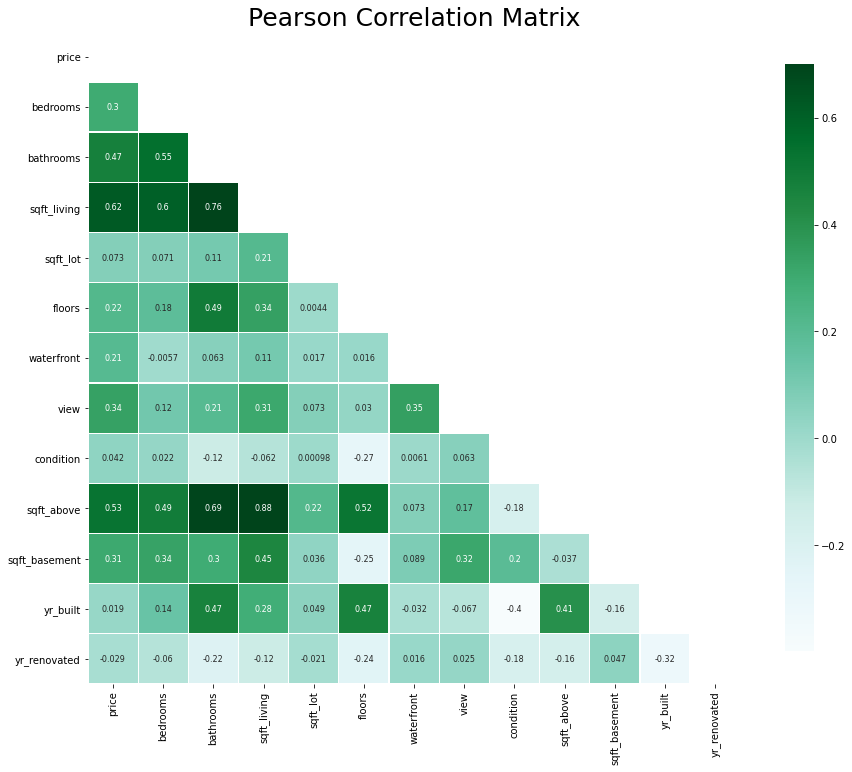

In [29]:
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
mask = np.zeros_like(houses_o[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(houses_o[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Making a Machine Learning Model

In [31]:
data= data.dropna(axis=0) #dropping missing values

In [32]:
y=data['price']

In [33]:
housefeatures = ['floors','sqft_living','sqft_lot','bedrooms','bathrooms', 'yr_built']

In [34]:
 X = data[housefeatures]

In [35]:
 X.head()

,floors,sqft_living,sqft_lot,bedrooms,bathrooms,yr_built
0,1.5,1340,7912,3.0,1.50,1955
1,2.0,3650,9050,5.0,2.50,1921
2,1.0,1930,11947,3.0,2.00,1966
3,1.0,2000,8030,3.0,2.25,1963
4,1.0,1940,10500,4.0,2.50,1976


In [36]:
 #Lets try ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instaniate ridge model
model = Ridge()
model.fit(X_train, y_train)

#check the score of the ridge model on test data
model.score(X_test, y_test)

0.030078480258443285

In [37]:
#Lets try random forest regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instaniate ridge model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#check the score of the ridge model on test data
model.score(X_test, y_test)


0.02175959451027154

In [38]:
from sklearn.linear_model import LinearRegression

#setup random seed
np.random.seed(42)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instaniate ridge model
model =  LinearRegression()
model.fit(X_train, y_train)

#check the score of the ridge model on test data
model.score(X_test, y_test)

0.03007565959924241

In [39]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instaniate ridge model
DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

#check the score of the ridge model on test data
model.score(X_test, y_test)

0.03007565959924241

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [41]:
from sklearn.linear_model import SGDRegressor

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instaniate ridge model
SGDRegressor(random_state=300)
model.fit(X_train, y_train)

#check the score of the ridge model on test data
model.score(X_test, y_test)

0.033488993252513755

In [42]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head(30)))

Making predictions for the following 5 houses:
   floors  sqft_living  sqft_lot  bedrooms  bathrooms  yr_built
0     1.5         1340      7912       3.0       1.50      1955
1     2.0         3650      9050       5.0       2.50      1921
2     1.0         1930     11947       3.0       2.00      1966
3     1.0         2000      8030       3.0       2.25      1963
4     1.0         1940     10500       4.0       2.50      1976
The predictions are
[ 362395.39856476 1086195.00179088  495371.76767894  541608.38832309
  423873.85635017  300320.35681333  370422.70808761  641672.76168799
  548716.32838071  405275.91373977  479565.30343887  958150.53575426
  551565.46881086  237145.04998325  797874.27555165  260840.65982629
  400174.79841493  780532.89462551  255537.0244635   196485.29130206
  766613.15076921  274114.308792    419076.91077831  658843.45150001
  343091.46560774  501473.24823219  669334.37730801  693834.29767161
  612645.10062056  771130.65401057]


In [43]:
print(model.predict(X.head(1)))

[362395.39856476]


In [ ]:
data.head(1)